## 시작 환경 구축

In [54]:
# 필요한 패키지 import
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore') 

In [55]:
# 한국어 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'   # Windows
# mpl.rcParams['font.family'] = 'AppleGothic'   # macOS
# mpl.rcParams['font.family'] = 'NanumGothic'   # Linux

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

### 데이터 로드

In [56]:
# colab에서 불러오기 (각자)
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [57]:
# 데이터 로드
train = pd.read_csv('/Data/25-2 Guide/train.csv')
test = pd.read_csv('/Data/25-2 Guide/test.csv')
building_info = pd.read_csv('/Data/25-2 Guide/building_info.csv')

### 데이터 확인

In [58]:
train.head()

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.0,5794.80
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.0,5591.85
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.0,5338.17
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.0,4554.42
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.0,3602.25


In [59]:
test.head()

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,1_20240825 00,1,20240825 00,26.5,0.0,0.7,80.0
1,1_20240825 01,1,20240825 01,26.1,0.0,0.0,80.0
2,1_20240825 02,1,20240825 02,25.9,0.0,0.3,83.0
3,1_20240825 03,1,20240825 03,25.7,0.0,1.1,83.0
4,1_20240825 04,1,20240825 04,25.5,0.0,1.0,86.0


In [60]:
building_info.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,호텔,82912.71,77586.00,-,-,-
1,2,상용,40658.90,30392.82,-,-,-
2,3,병원,560431.00,418992.00,278.58,-,-
3,4,호텔,41813.29,23715.71,-,-,-
4,5,학교,403749.39,248507.00,1983.05,1025,250


### 데이터 사이즈 확인

In [61]:
train.shape

(204000, 10)

In [62]:
test.shape

(16800, 7)

### 데이터 타입과 Null 데이터 확인

In [63]:
# 컬럼명 추출
# train.columns.tolist() #(' ' 있는 버전)
for col in train.columns:
    print(col)

num_date_time
건물번호
일시
기온(°C)
강수량(mm)
풍속(m/s)
습도(%)
일조(hr)
일사(MJ/m2)
전력소비량(kWh)


In [64]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [65]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(°C)         16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 918.9+ KB


In [66]:
building_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


#### 보다 정확하게 Null 데이터 확인하기

In [67]:
train.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
일조(hr)           0
일사(MJ/m2)        0
전력소비량(kWh)       0
dtype: int64

In [68]:
test.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
dtype: int64

In [69]:
building_info.isnull().sum()

건물번호            0
건물유형            0
연면적(m2)         0
냉방면적(m2)        0
태양광용량(kW)       0
ESS저장용량(kWh)    0
PCS용량(kW)       0
dtype: int64

### 다섯 수치 요약 (5 number summary) 확인

In [70]:
train.describe()

,건물번호,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
count,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000
mean,50.500000,26.098130,0.304185,1.967977,75.206706,0.277459,0.702752,3329.575857
std,28.866141,4.052888,2.052947,1.316102,16.378490,0.396476,1.017394,3689.102792
min,1.000000,8.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,23.500000,0.000000,1.000000,64.000000,0.000000,0.000000,1176.120000
50%,50.500000,26.300000,0.000000,1.800000,78.000000,0.000000,0.050000,1935.720000
75%,75.250000,28.800000,0.000000,2.700000,88.000000,0.600000,1.230000,3726.765000
max,100.000000,38.700000,100.900000,15.200000,100.000000,1.000000,3.950000,27155.940000


## 데이터 전처리

In [71]:
# 빌딩 정보 합치기
train = train.merge(building_info, on="건물번호", how="left")
test = test.merge(building_info, on="건물번호", how="left")

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
 10  건물유형           204000 non-null  object 
 11  연면적(m2)        204000 non-null  float64
 12  냉방면적(m2)       204000 non-null  float64
 13  태양광용량(kW)      204000 non-null  object 
 14  ESS저장용량(kWh)   204000 non-null  object 
 15  PCS용량(kW)      204000 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 24.9+ MB


### 한국어 -> 영어 변환 매핑 맵

In [73]:
# train.
train.columns = [
    'num_date_time',          # 기존과 동일
    'building_id',            # 건물번호
    'date',              # 일시
    'temperature',          # 기온(°C)
    'precipitation',       # 강수량(mm)
    'windspeed',         # 풍속(m/s)
    'humidity',       # 습도(%)
    'sunshine_hours',         # 일조(hr)
    'solar_radiation',  # 일사(MJ/m2)
    'power_consumption',  # 전력소비량(kWh)
    'building_type',          # 건물유형
    'total_floor_area',    # 연면적(m2)
    'cooling_area',        # 냉방면적(m2)
    'solar_capacity',      # 태양광용량(kW)
    'ess_capacity',       # ESS저장용량(kWh)
    'pcs_capacity'         # PCS용량(kW)
]
# test
test.columns = [
    'num_date_time',          # 기존과 동일
    'building_id',            # 건물번호
    'date',              # 일시
    'temperature',          # 기온(°C)
    'precipitation',       # 강수량(mm)
    'windspeed',         # 풍속(m/s)
    'humidity',       # 습도(%)
    'building_type',          # 건물유형
    'total_floor_area',    # 연면적(m2)
    'cooling_area' ,       # 냉방면적(m2)
    'solar_capacity',      # 태양광용량(kW)
    'ess_capacity',       # ESS저장용량(kWh)
    'pcs_capacity'         # PCS용량(kW)
]

### 피쳐 추가

In [74]:
# 피쳐 가공
def basic_preprocess (df):
    # timestamp를 datetime 형식으로 변환
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d %H', errors='coerce')
    # '-' → NaN, 그리고 float로 변환할 대상 컬럼
    cols_to_fix = ['solar_capacity', 'ess_capacity', 'pcs_capacity']
    for col in cols_to_fix:
        if col in df.columns:
            df[col] = df[col].replace('-', np.nan)           # '-' 문자열을 nan으로
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(float)
    return df

In [75]:
train = basic_preprocess(train)
test = basic_preprocess(test)

In [76]:
train.isna().sum().sum()

np.int64(0)

In [77]:
# 날짜 분리하기
def date_features(df):
    df = df.copy()
    
    # 날짜 파생 변수 생성
    df['hour'] = df['date'].dt.hour      # 시
    df['dow'] = df['date'].dt.dayofweek  # 요일 (월:0, 일:6)
    df['month'] = df['date'].dt.month    # 월
    df['day'] = df['date'].dt.day        # 일
    df['is_weekend'] = df['dow'].apply(lambda x: 1 if x >= 5 else 0)

    # 같은 날짜 평균 습도로 대체
    # (building_id별 같은 날짜 평균을 계산해서 사용)
    df['humidity'] = df.groupby(['building_id', 'month', 'day'])['humidity'] \
                       .transform(lambda x: x.replace(0, x[x != 0].mean() if (x != 0).any() else 0))

    # 냉방 면적 → 냉방 비율로 변환
    if 'total_floor_area' in df.columns and 'cooling_area' in df.columns:
        total = pd.to_numeric(df['total_floor_area'], errors='coerce').replace(0, np.nan)
        cooling = pd.to_numeric(df['cooling_area'], errors='coerce').fillna(0)
        df['cooling_ratio'] = (cooling / total).fillna(0).clip(0, 1)  # 0~1 범위로 제한
    else:
        df['cooling_ratio'] = 0.0
        
    # 정렬
    df = df.sort_values(['building_id', 'date']).reset_index(drop=True)
    return df

In [78]:
train = date_features(train)
test = date_features(test)

In [79]:
# 불쾌지수 - 습도 + 온도 반영
# 트리 모델이면 습도 + 온도 + 불쾌지수, 시계열 모델이면 습도 온도 뺴고 불쾌지수만 사용
# THI = (1.8T + 32) − 0.55(1 − RH)(1.8T − 26),  T in °C, RH in [0,1]
for df in (train, test):
    T = df['temperature']
    RH = df['humidity'] / 100.0
    df['THI'] = (1.8*T + 32) - 0.55*(1 - RH)*(1.8*T - 26)

In [80]:
# PV/ESS 있나 없나. 
def add_pv_ess_features(df: pd.DataFrame) -> pd.DataFrame:
    ta = df['total_floor_area'].replace(0, np.nan)

    df['has_pv']  = (df['solar_capacity'].fillna(0) > 0).astype(int)
    df['has_ess'] = (df['ess_capacity'].fillna(0)  > 0).astype(int)

    return df

# 전체 적용 함수

def add_all_features(df: pd.DataFrame) -> pd.DataFrame:
    df = add_pv_ess_features(df)
    return df

# train, test에 적용
train = add_all_features(train)
test  = add_all_features(test)

In [81]:
# CDH: base 26°C 이동합
# “최근 몇 시간 동안 얼마나 더웠나”
def CDH(xs, base=26, win=11):
    xs = np.asarray(xs)
    y = xs - base
    cs = np.cumsum(y)
    # 앞부분은 부분 누적, 이후는 이동합(cs[t]-cs[t-win])
    head = cs[:win]
    tail = cs[win:] - cs[:-win]
    return np.concatenate([head, tail])

def add_cdh_by_building(df, bcol='building_id', tcol='temperature', base=26, win=11):
    # 건물별 시간 정렬 보장
    df = df.sort_values([bcol, 'date']).copy()
    # CDH 계산 결과를 같은 순서로 붙이기
    out = []
    for bid, g in df.groupby(bcol, sort=False):
        out.append(pd.Series(CDH(g[tcol].values, base=base, win=win), index=g.index))
    df['CDH'] = pd.concat(out).sort_index()
    return df


train = add_cdh_by_building(train, bcol='building_id', tcol='temperature', base=26, win=11)
test  = add_cdh_by_building(test,  bcol='building_id', tcol='temperature', base=26, win=11)

In [82]:
 # Datetime Fourier transform
train['sin_hour'] = np.sin(2 * np.pi * train['hour']/23.0)
train['cos_hour'] = np.cos(2 * np.pi * train['hour']/23.0)
test['sin_hour'] = np.sin(2 * np.pi * test['hour']/23.0)
test['cos_hour'] = np.cos(2 * np.pi * test['hour']/23.0)

train['sin_date'] = -np.sin(2 * np.pi * (train['month']+train['day']/31)/12)
train['cos_date'] = -np.cos(2 * np.pi * (train['month']+train['day']/31)/12)
test['sin_date'] = -np.sin(2 * np.pi * (test['month']+test['day']/31)/12)
test['cos_date'] = -np.cos(2 * np.pi * (test['month']+test['day']/31)/12)

train['sin_month'] = -np.sin(2 * np.pi * train['month']/12.0)
train['cos_month'] = -np.cos(2 * np.pi * train['month']/12.0)
test['sin_month'] = -np.sin(2 * np.pi * test['month']/12.0)
test['cos_month'] = -np.cos(2 * np.pi * test['month']/12.0)

train['sin_dayofweek'] = -np.sin(2 * np.pi * (train['dow']+1)/7.0)
train['cos_dayofweek'] = -np.cos(2 * np.pi * (train['dow']+1)/7.0)
test['sin_dayofweek'] = -np.sin(2 * np.pi * (test['dow']+1)/7.0)
test['cos_dayofweek'] = -np.cos(2 * np.pi * (test['dow']+1)/7.0)

In [104]:

# 해석력 필요하면 이거 쓰면 안됨
# Only 예측력 비교
# 시간대 평균/표준편차 특징
# 요일별 패턴 + 일반적인 시간대별 패턴을 동시에 반영하려
def attach_time_stats(tr, te, bcol='building_id'):
    keys_bhd = [bcol, 'hour', 'dow']
    keys_bh  = [bcol, 'hour']

    mean_bhd = tr.groupby(keys_bhd)['power_consumption'].mean().reset_index().rename(columns={'power_consumption':'day_hour_mean'})
    std_bhd  = tr.groupby(keys_bhd)['power_consumption'].std().reset_index().rename(columns={'power_consumption':'day_hour_std'})

    mean_bh  = tr.groupby(keys_bh)['power_consumption'].mean().reset_index().rename(columns={'power_consumption':'hour_mean'})
    std_bh   = tr.groupby(keys_bh)['power_consumption'].std().reset_index().rename(columns={'power_consumption':'hour_std'})

    for df in (tr, te):
        df.merge(mean_bhd, on=keys_bhd, how='left', copy=False)
        df.merge(std_bhd,  on=keys_bhd, how='left', copy=False)
        df.merge(mean_bh,  on=keys_bh,  how='left', copy=False)
        df.merge(std_bh,   on=keys_bh,  how='left', copy=False)

    # 위 merge들은 in-place가 아니라서 다시 대입
    tr = tr.merge(mean_bhd, on=keys_bhd, how='left') \
           .merge(std_bhd,  on=keys_bhd, how='left') \
           .merge(mean_bh,   on=keys_bh,  how='left') \
           .merge(std_bh,    on=keys_bh,  how='left')

    te = te.merge(mean_bhd, on=keys_bhd, how='left') \
           .merge(std_bhd,  on=keys_bhd, how='left') \
           .merge(mean_bh,   on=keys_bh,  how='left') \
           .merge(std_bh,    on=keys_bh,  how='left')
    return tr, te

train, test = attach_time_stats(train, test, bcol='building_id')


In [84]:
# “지금 시점 얼마나 더운가”
def add_temp_features(df: pd.DataFrame) -> pd.DataFrame:
    T = df['temperature']
    df['temp_above_24'] = (T - 24).clip(lower=0)
    df['temp_above_28'] = (T - 28).clip(lower=0)

    return df

train = add_temp_features(train)
test  = add_temp_features(test)

#### test, 일조 일사량 예측, 태양 노출량 = 일조 * 일사 추가

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

RANDOM_STATE = 42

# 2) 학습/예측에 사용할 공통 피처
features = ["temperature", "precipitation", "windspeed", "humidity", "hour"]
X = train[features]
X_test = test[features]

# 타깃
y_sun = train["sunshine_hours"]
y_rad = train["solar_radiation"]

# 3) 검증용 분할
X_train, X_val, y_train_sun, y_val_sun = train_test_split(
    X, y_sun, test_size=0.2, random_state=RANDOM_STATE
)
X_train2, X_val2, y_train_rad, y_val_rad = train_test_split(
    X, y_rad, test_size=0.2, random_state=RANDOM_STATE
)

# 4) 모델 정의/학습
rf_sun = RandomForestRegressor(n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1)
rf_rad = RandomForestRegressor(n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1)

rf_sun.fit(X_train, y_train_sun)
rf_rad.fit(X_train2, y_train_rad)

# 5) 검증 성능
pred_sun = rf_sun.predict(X_val)
pred_rad = rf_rad.predict(X_val2)

print("🌞 일조(hr) 예측 성능")
print(" - R² :", r2_score(y_val_sun, pred_sun))
print(" - MAE:", mean_absolute_error(y_val_sun, pred_sun))

print("\n☀️ 일사(MJ/m2) 예측 성능")
print(" - R² :", r2_score(y_val_rad, pred_rad))
print(" - MAE:", mean_absolute_error(y_val_rad, pred_rad))

# 6) 전체 데이터로 재학습 후 test 예측
rf_sun.fit(X, y_sun)
rf_rad.fit(X, y_rad)

test["sunshine_hours"] = rf_sun.predict(X_test)
test["solar_radiation"] = rf_rad.predict(X_test)

# 7) 밤 시간(21~05시) 보정 → 0
mask_night = (test["hour"] >= 21) | (test["hour"] <= 5)
test.loc[mask_night, ["pred_sunshine_hours", "pred_solar_radiation"]] = 0

🌞 일조(hr) 예측 성능
 - R² : 0.9389541703337296
 - MAE: 0.030128566146432927

☀️ 일사(MJ/m2) 예측 성능
 - R² : 0.9224796789507823
 - MAE: 0.08019214922035403


In [86]:
# 태양 노출량 = 일조 * 일사
for df in (train, test):
    df['solar_exposure'] = df['sunshine_hours'] * df['solar_radiation']

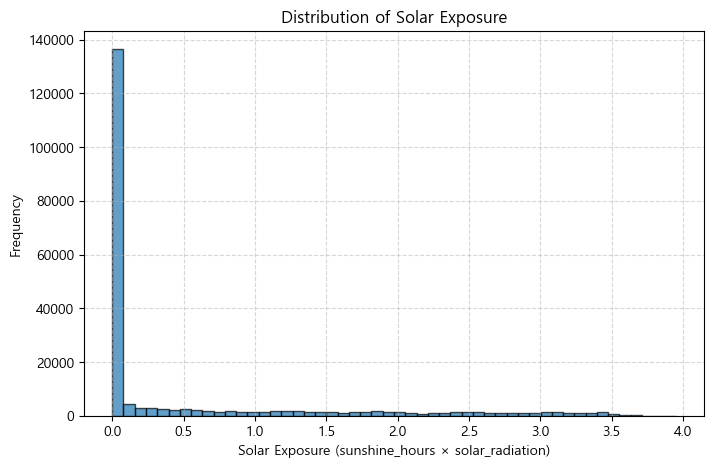

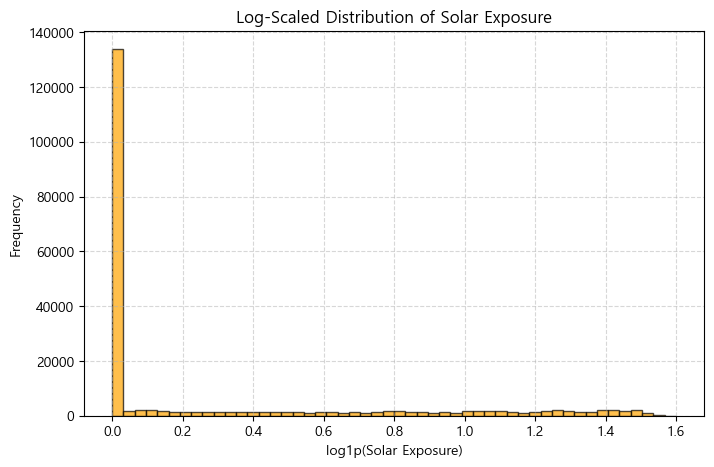

count    204000.000000
mean          0.504152
std           0.937652
min           0.000000
25%           0.000000
50%           0.000000
75%           0.546500
max           3.950000
Name: solar_exposure, dtype: float64


In [87]:
# 2. 히스토그램
plt.figure(figsize=(8,5))
plt.hist(train["solar_exposure"].dropna(), bins=50, alpha=0.7, edgecolor="black")
plt.title("Distribution of Solar Exposure")
plt.xlabel("Solar Exposure (sunshine_hours × solar_radiation)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 3. 로그 스케일 분포 확인 (값이 0인 경우 제외)
plt.figure(figsize=(8,5))
log_vals = np.log1p(train["solar_exposure"].dropna())  # log(1+x) → 0도 안전하게 변환
plt.hist(log_vals, bins=50, alpha=0.7, edgecolor="black", color="orange")
plt.title("Log-Scaled Distribution of Solar Exposure")
plt.xlabel("log1p(Solar Exposure)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 4. 기초 통계량
print(train["solar_exposure"].describe())


### 피쳐 및 행 삭제

In [88]:
def delete_feature (df):
    # 필요 없는 컬럼 제거
    # 트리 기반 (상관관계 크게 상관 없다면)
    df = df.drop(columns=['num_date_time','cooling_area',], errors='ignore')
    # 시계열 기반 ( or 다중공선성 위험있으면 요 모델로)
    #df = df.drop(columns=['num_date_time', 'sunshine_hours','ess_capacity','pcs_capacity',
    #                      'solar_radiation','cooling_area','humidity','temperature'], errors='ignore')
    return df

In [89]:
train = delete_feature(train)
test = delete_feature(test)

In [90]:
# 전력소비량이 0인 행 개수 확인
zero_count = (train['power_consumption'] == 0).sum()
print("삭제할 행 수:", zero_count)
# 0인 행 제거
train = train[train['power_consumption'] != 0].copy()

삭제할 행 수: 68


### 주중 주말 피쳐(미사용)

In [91]:
# 주중 주말 추후에 사용(?)
#train["is_weekend"] = train["weekday"].isin([5,6]).astype(int)
#train["week_type"] = train["is_weekend"].map({0:"주중", 1:"주말"})

### 범주형 데이터 level 값 확인

In [92]:
# 범주형 변수명 선택 출력
cat_df = train.select_dtypes(include=['object']) # 범주형 데이터 프레임 구분
print(cat_df.columns.tolist()) # 컬럼명만 출력

['building_type']


In [93]:
# 범주형: ['building_type']

In [94]:
cat_cols = ['building_type']

for col in cat_cols:
    print(f"\n{col} value counts:")
    print(train[col].value_counts())


building_type value counts:
building_type
백화점         32636
호텔          20399
건물기타        20398
학교          20397
상용          20395
IDC(전화국)    18359
연구소         18356
병원          18342
아파트         18333
공공          16317
Name: count, dtype: int64


## EDA & 시각화

In [105]:
# 히트맵 생성 
# 숫자형 변수만 선택 (범주형 변수는 제외)
numeric_df = train.select_dtypes(include=['float64', 'int64']) # 숫자형 데이터 프레임 구분
print(numeric_df.columns.tolist()) # 컬럼명만 출력

['building_id', 'temperature', 'precipitation', 'windspeed', 'humidity', 'sunshine_hours', 'solar_radiation', 'power_consumption', 'total_floor_area', 'solar_capacity', 'ess_capacity', 'pcs_capacity', 'is_weekend', 'cooling_ratio', 'THI', 'has_pv', 'has_ess', 'CDH', 'sin_hour', 'cos_hour', 'sin_date', 'cos_date', 'sin_month', 'cos_month', 'sin_dayofweek', 'cos_dayofweek', 'temp_above_24', 'temp_above_28', 'solar_exposure', 'day_hour_mean_x', 'day_hour_std_x', 'hour_mean_x', 'hour_std_x', 'day_hour_mean_y', 'day_hour_std_y', 'hour_mean_y', 'hour_std_y']


In [106]:
# 시각화용 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

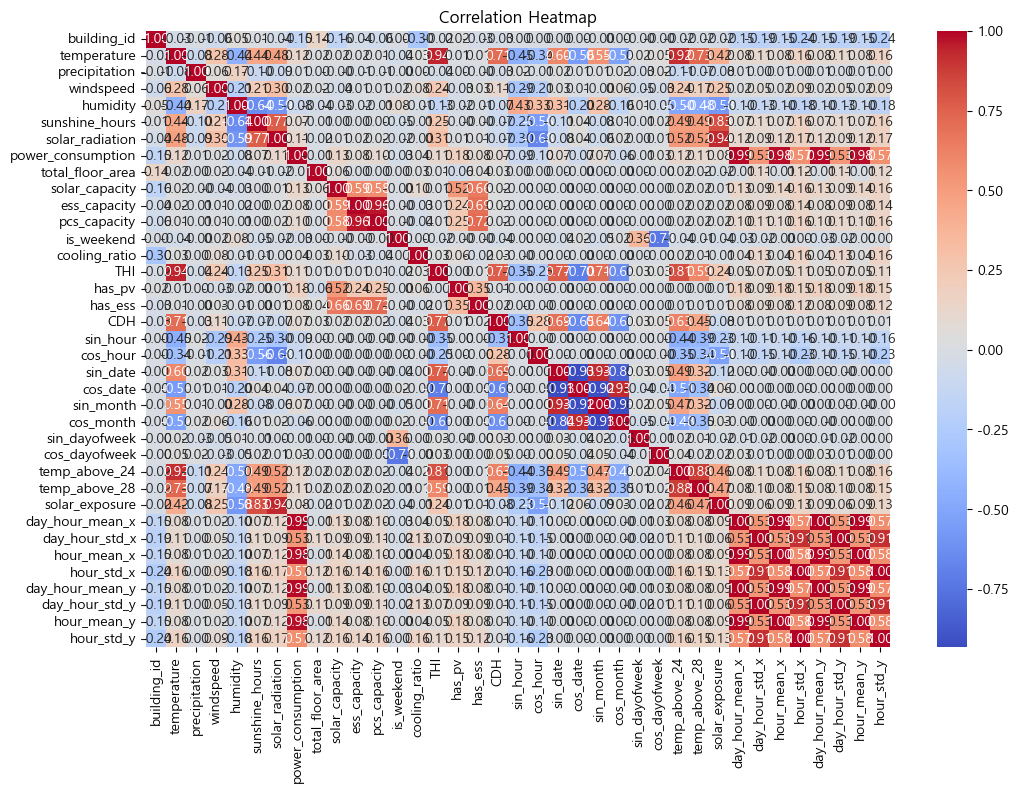

In [107]:
# 상관관계 행렬 계산
corr_matrix = numeric_df.corr()

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [108]:
# 범주형 컬럼 리스트 - 붙여와야함
cat_features = ['building_type']

# category 타입으로 변환
for col in cat_features:
    if col in train.columns:
        train[col] = train[col].astype("category")
        test[col] = test[col].astype("category")

# target / feature 분리
target = "power_consumption"
features = [c for c in train.columns if c not in [target, "date"]]

X = train[features]
y = train[target]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

import lightgbm as lgb

model = lgb.LGBMRegressor(
    objective="regression",
    metric="rmse",
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=1000,
    random_state=42
)

# 학습 (categorical_feature 지정)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(50, verbose=True)],
    categorical_feature=cat_features
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4643
[LightGBM] [Info] Number of data points in the train set: 163145, number of used features: 41
[LightGBM] [Info] Start training from score 3332.573101
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 211.451


LGBMRegressor(learning_rate=0.05, metric='rmse', n_estimators=1000,
              objective='regression', random_state=42)

Top 20 Feature Importance:
day_hour_std_x       4016
sin_date             3382
day_hour_mean_x      3115
day                  2131
hour_std_x           1731
building_id          1538
CDH                  1264
THI                  1250
total_floor_area     1181
building_type        1180
hour_mean_x          1107
cooling_ratio        902
humidity             849
dow                  815
solar_capacity       801
temperature          619
windspeed            608
solar_radiation      552
hour                 525
sin_hour             490


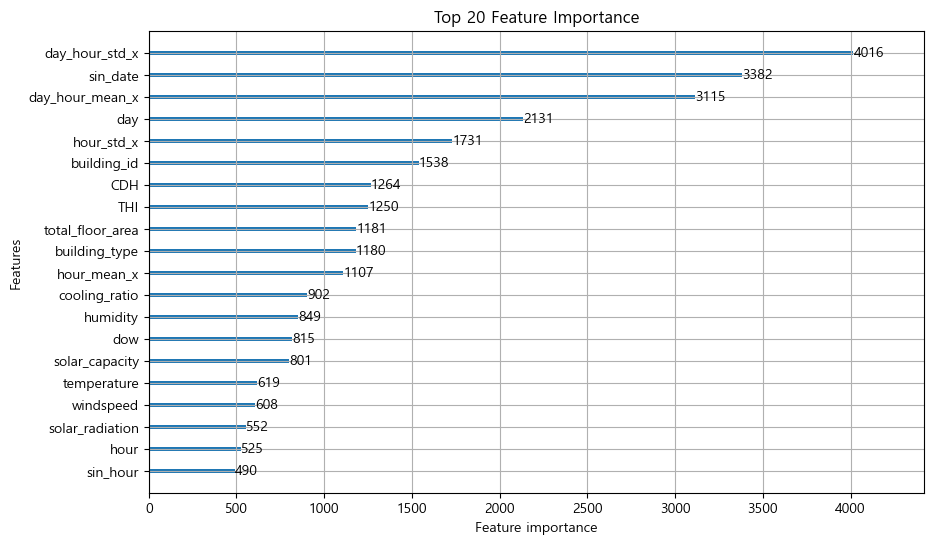

In [109]:
importances = model.feature_importances_
feat_imp = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

print("Top 20 Feature Importance:")
for f, imp in feat_imp[:20]:
    print(f"{f:20s} {imp}")

# 시각화
lgb.plot_importance(model, max_num_features=20, figsize=(10,6))
plt.title("Top 20 Feature Importance")
plt.show()

### 분포 점검

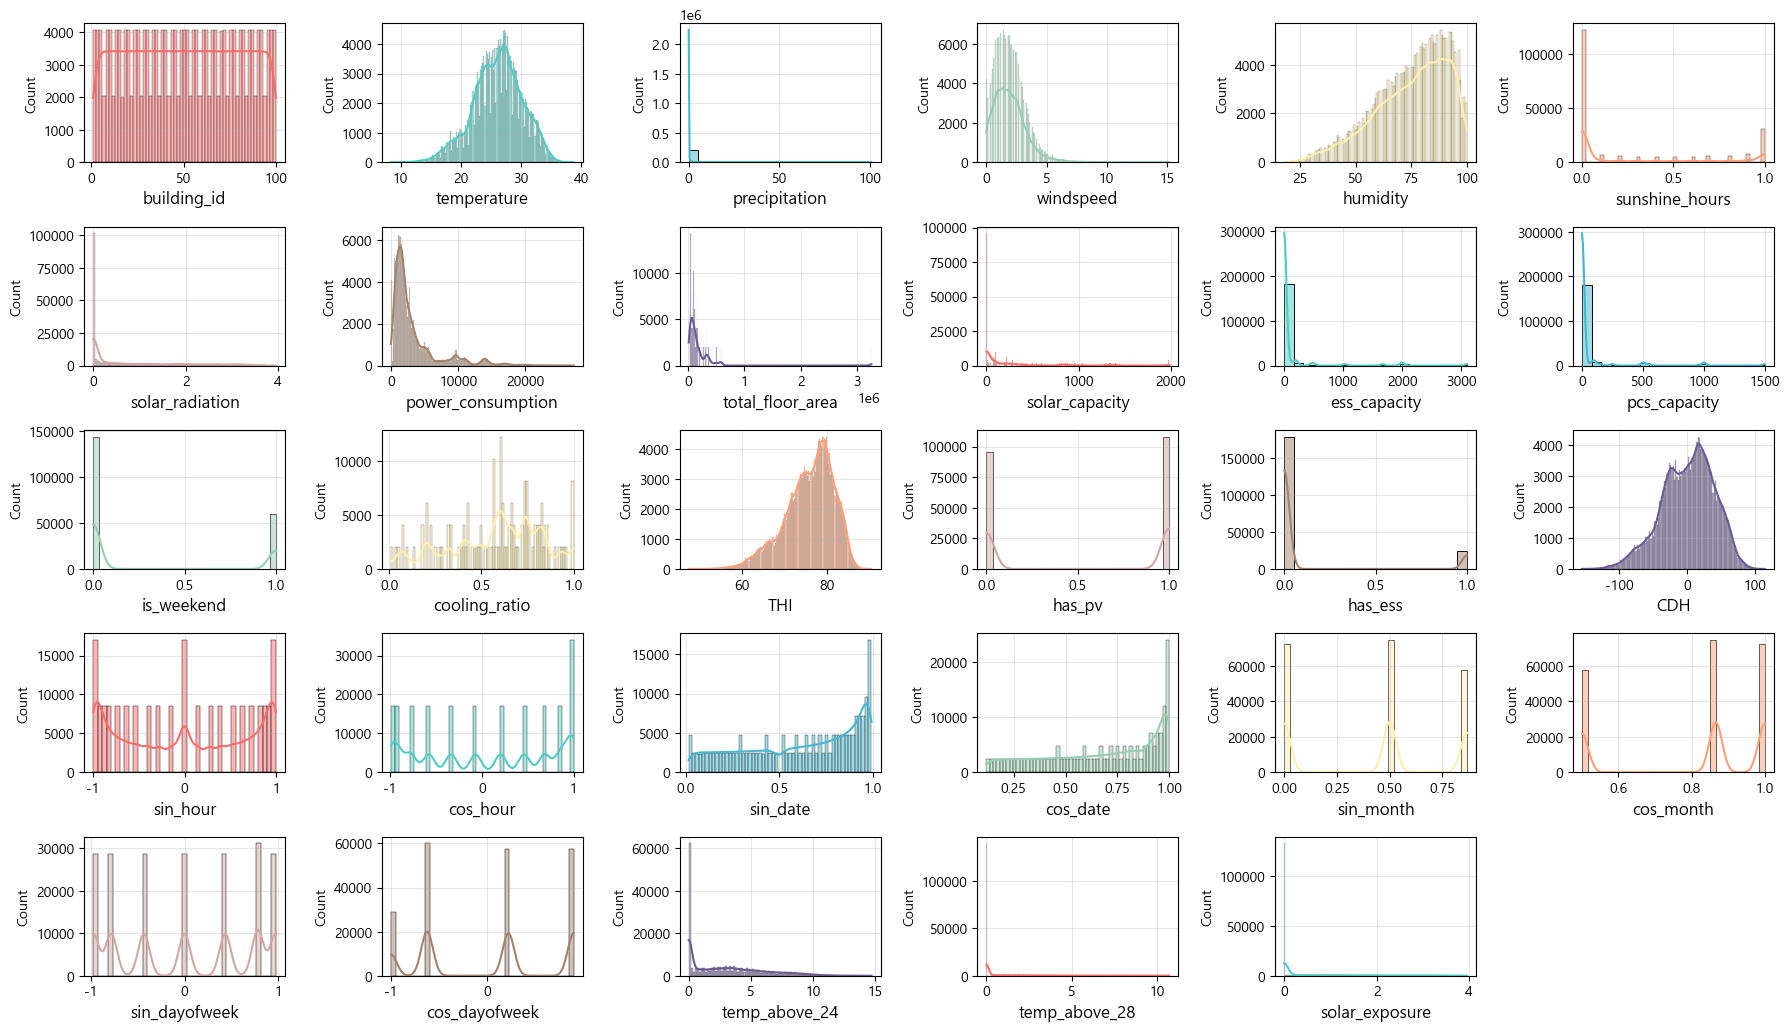

In [102]:
# 시각화 - 분포 확인

# 3. 색상 리스트 (컬럼 수에 맞춰 늘려도 됨)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD',
          '#FF9F76', '#D4A5A5', '#A2836E', '#6B5B95']

plt.figure(figsize=(18, 12))

for i, column in enumerate(numeric_df, 1):
    plt.subplot(6, 6, i)
    color = colors[(i-1) % len(colors)]  # 색상 리스트 반복 사용
    sns.histplot(train[column], kde=True, color=color, edgecolor='black')
    plt.xlabel(column, fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [110]:
# 8. 저장
test.to_csv("test1.csv", index=False)
print("\n✅ test_with_sunshine.csv 저장 완료!")


✅ test_with_sunshine.csv 저장 완료!


## Prediction

## Submission

In [ ]:
#submission = pd.read_csv('./sample_submission.csv')
#submission['answer'] = preds

In [ ]:
#submission.to_csv('./baseline_submission.csv', index=False)